<a href="https://colab.research.google.com/github/antonioalonsocr/DocAppointmentAttendance/blob/main/DocAppointmentPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [32]:
doc_df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Project2/DocAppNoShow.csv')
doc_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
doc_df['AppointmentID'].duplicated().any()

False

In [34]:
# There are no missing values
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [35]:
print(datetime.strptime(doc_df['AppointmentDay'][1], '%Y-%m-%dT%H:%M:%SZ'))

2016-04-29 00:00:00


In [36]:
# Changing the type of columns to fit their type;
# From object (string) to a datetime object
doc_df['ScheduledDay'] = pd.to_datetime(doc_df['ScheduledDay'])
doc_df['AppointmentDay'] = pd.to_datetime(doc_df['AppointmentDay'])

In [37]:
doc_df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [38]:
# Now I want to change the values of No-show to binary,
# where 1 indicates the person did not attend the appointment
doc_df['No-show'].replace({'No':'0','Yes':'1'},inplace=True)
doc_df['No-show'] = doc_df['No-show'].astype('int')

In [39]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [40]:
doc_df.set_index('AppointmentID',inplace=True)
doc_df.rename(columns={'Hipertension':'Hypertension',
               'PatientId':'PatientID',
               'No-show':'NoShow',
               'SMS_received':'SMSReceived',
               'Handcap':'Handicap'},inplace=True)

In [41]:
doc_df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [42]:
# It is hard to tell because there are so many different neighbourhoods,
# but it seems like there are no misspellings of the neighbourhoods or 
# in the gender column

print(doc_df['Gender'].value_counts())
print('\n\n\n',doc_df['Neighbourhood'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64



 JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


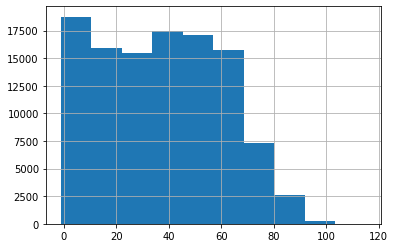

In [43]:
doc_df['Age'].hist()

In [44]:
print(min(doc_df['Age']))
print(max(doc_df['Age']))

-1
115


In [45]:
# there is only 1 -1 value, it might be worth removing it.
# All the other ages make sense; having an age of 0 means its a newborn
# and out of so many patients it is expected there are patients over 100,
# also patients could schedule more than one appointment
doc_df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [46]:
# Succesfully dropped row
doc_df.drop(doc_df[doc_df['Age']==-1].index.tolist(),inplace=True)
min(doc_df['Age'])

0

In [47]:
NoShow_filter = doc_df['NoShow'] == 1

34.31766656212196


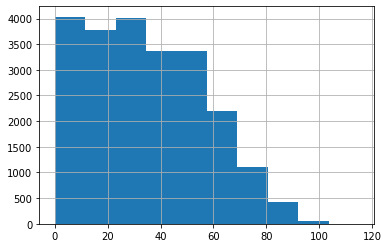

In [48]:
print(doc_df['Age'][NoShow_filter].mean())
doc_df['Age'][NoShow_filter].hist();

37.790504154999034


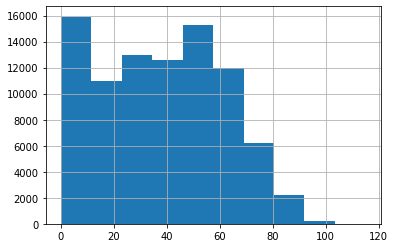

In [49]:
print(doc_df['Age'][~NoShow_filter].mean())
doc_df['Age'][~NoShow_filter].hist();

The distributions look similar, with those that did attend the appointment having a slightly higher mean age (37.8 vs. 34.3)

<BarContainer object of 2 artists>

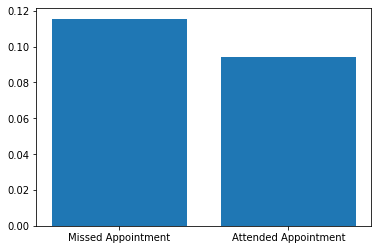

In [50]:
Scholarship_mean_list = [doc_df['Scholarship'][NoShow_filter].mean(), doc_df['Scholarship'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Scholarship_mean_list)

It is more likely that a person who missed the appointment has a scholarship.

<BarContainer object of 2 artists>

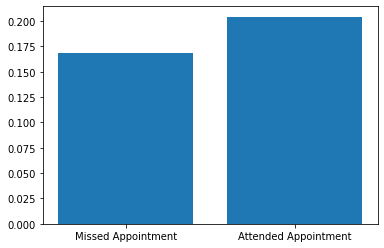

In [51]:
Hypertension_mean_list = [doc_df['Hypertension'][NoShow_filter].mean(), doc_df['Hypertension'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Hypertension_mean_list)

There is a difference between the two

<BarContainer object of 2 artists>

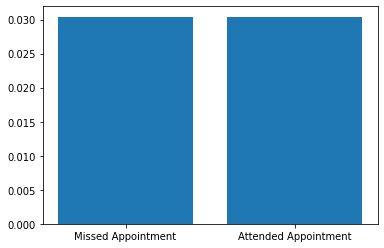

In [52]:
Alcoholism_mean_list = [doc_df['Alcoholism'][NoShow_filter].mean(), doc_df['Alcoholism'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Alcoholism_mean_list)

There seems to be nearly no difference between them